In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

### This is a single perceptron model that DOES NOT use PyTorch!

Propagation and optimization functions are the same as slideshow, except our activation function is not a sigmoid but a unit step (so we ignore its derivative).

In [4]:
def forward_propagation(x, y, weights, bias):
    """
    x: training data as a vector (nparray), where each value corresponds
        to a feature's value
    y: label (0 or 1)
    weights: weights of the perceptron
    bias: bias
    """
    y_pred = predict(x, weights, bias)
    loss = (y_pred - y)**2
    d_loss = 2*(y_pred - y)

    return y_pred, loss, d_loss

In [5]:
def optimize_perceptron(x, y, learning_rate,  maxEpochs, ):
    """
    Optimizes the Perceptron's weights by looping over the same steps for the specified number of epochs.
    Steps:
    1. Forward propagate data point
    2. Backpropagate
    3. Update weights
    4. Check stop conditions while looping
    """
    epoch = 0
    error = 999
    weights = np.random.rand(x.shape[1])
    bias = np.random.rand()

    errors = list()
    epochs = list()

    # Loop until stop conditions are met
    while (epoch <= maxEpochs) and (error > 9e-4):

        loss_ = 0
        # Loop over every data point
        for i in range(x.shape[0]):

            # Forward Propagation on each data point
            y_pred, loss, d_loss = forward_propagation(x[i], y[i], weights, bias)

            # Backpropagation
            partial_derivates = backpropagation(x[i], d_loss)

            # Learn by updating the weights of the perceptron
            weights = weights - (learning_rate * np.array(partial_derivates))

        # Evaluate the results
        for index, feature_value_test in enumerate(x):
            y_pred, loss, d_loss = forward_propagation(feature_value_test, y[index], weights, bias)
            loss_ += loss

        errors.append(loss_/len(x))
        epochs.append(epoch)
        error = errors[-1]
        epoch += 1

        print('Epoch {}. loss: {}'.format(epoch, errors[-1]))


    return weights, bias, errors

# def optimize_perceptron(x, y, learning_rate, maxEpochs, ):
#     """
#     Optimizes the Perceptron's weights by looping over the same steps for the specified number of epochs.
#     Steps:
#     1. Forward propagate data point
#     2. Backpropagate
#     3. Update weights
#     4. Check stop conditions while looping
#     """
#     epoch = 0
#     error = 999
#     weights = np.random.rand(x.shape[1])  # initialize weights randomly
#     bias = np.random.rand()  # initialize bias randomly

#     errors = list()
#     epochs = list()

#     # Loop until stop conditions are met
#     while (epoch <= maxEpochs) and (error > 9e-4):

#         loss_ = 0
#         # Loop over every data point
#         for i in range(x.shape[0]):

#             # Forward Propagation on each data point
#             y_pred, loss, d_loss = forward_propagation(x[i], y[i], weights, bias)

#             # Backpropagation
#             partial_derivates = backpropagation(x[i], d_loss)

#             # Learn by updating the weights of the perceptron
#             weights = weights - (learning_rate * np.array(partial_derivates))

#             # Ensure weights remain positive
#             weights = np.clip(weights, 0, None)

#         # Evaluate the results
#         for index, feature_value_test in enumerate(x):
#             y_pred, loss, d_loss = forward_propagation(feature_value_test, y[index], weights, bias)
#             loss_ += loss

#         errors.append(loss_ / len(x))
#         epochs.append(epoch)
#         error = errors[-1]
#         epoch += 1

#         print('Epoch {}. loss: {}'.format(epoch, errors[-1]))

#     return weights, bias, errors


In [6]:
def activation_function(prediction):
    """
    Receives the output of the perceptron's function as parameter, and applies the
    activation function on it.
    In this simple model, the activation function is a unit step which classifies
    negative inputs as 0 and positive inputs as 1.
    """
    if prediction >= 0:
        return 1
    return 0


def predict(x, weights, bias):
    """
    Predicts the class of a given data point (x) by running the input through
    the neuron (dot product) and then applying the activation function.
    """
    prediction = np.dot(weights, x) + bias
    prediction = activation_function(prediction)

    return (prediction)

In [7]:
def backpropagation(x, d_loss):
    """
    Performs the Backpropagation step on a given data point.
    Receives as input the data point, the Perceptron's weights and the partial derivative of the loss
    over the predicted y.
    The received derivative is used to calculate the partial derivative of the loss over the weight of each feature.
    A list with the partial derivatives of the loss over each weight is returned.
    """
    partial_derivates = list()
    for feature_value in x:
        partial_derivates.append(d_loss*feature_value)

    return partial_derivates

### Formatting our Data

In [162]:
data = pd.read_csv('data_mnist.zip')

# Take only data with labels 1
data_ones = data[data['label'] == 5]

# Take only data with labels 0
data_zeros = data[data['label'] == 6]

# If you want to change either digit, just change the label value to either a 0 or a 1 so the math works out
# Ex. data_zeros = data[data['label'] == 7]
data_zeros['label'] = 0
data_ones['label'] = 1

# Concatenate instances with label 0 and 1
data = pd.concat([data_ones, data_zeros])
print(data.shape)
print(np.unique(data['label'].to_numpy()))

# # Split dataset with 75% training data and 25% test data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=1, shuffle=True)

# Split datasets into features and labels
x_train = train_data.drop('label', axis=1).to_numpy()
x_test = test_data.drop('label', axis=1).to_numpy()
y_train = train_data['label'].to_numpy()
y_test = test_data['label'].to_numpy()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Rescale data points to values between 0 and 1 (pixels are originally 0-255)
x_train = x_train / 255.
x_test = x_test / 255.

C:\Users\jacob\AppData\Local\Temp\ipykernel_32348\3792285982.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_zeros['label'] = 0
C:\Users\jacob\AppData\Local\Temp\ipykernel_32348\3792285982.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ones['label'] = 1


(7932, 785)
[0 1]
(5949, 784)
(1983, 784)
(5949,)
(1983,)


In [163]:
# def shrinkdata(data, res):
#     """
#     Reformats the input data at a lower resolution.
#     data: Our input data matrix
#     res:  The resolution (must be a factor of 28)
#     """
#     data = data[0:].reshape([data.shape[0], 28, 28])
#     data = data.reshape(data.shape[0], res, int(28 / res), res, int(28 / res)).sum(axis=2).sum(axis=3)
#     data = data / ((28 / res)**2)
#     data = data[0:].reshape(data.shape[0], res**2)
#     return data

# def shrinkpoint(data, res):
#     """
#     Same as shrinkdata, but for a single 784 pixel image
#     """
#     data = data.reshape([28, 28])
#     data = data.reshape(res, int(28 / res), res, int(28 / res)).sum(axis=1).sum(axis=2)
#     data = data / ((28 / res)**2)
#     data = data.reshape(res**2)
#     return data

from skimage.transform import resize
import numpy as np

def shrinkdata(data, res):
    """
    Reformats the input data at a lower resolution.
    data: Input data matrix of shape (N, 784) or (N, height, width)
    res:  The target resolution (res x res)
    """
    data = data.reshape(data.shape[0], 28, 28)  # Assumes original data is 28x28
    target_shape = (res, res)
    resized_data = np.array([resize(image, target_shape, anti_aliasing=True) for image in data])
    resized_data = resized_data.reshape(data.shape[0], res**2)  # Flatten the data
    return resized_data

def shrinkpoint(data, res):
    """
    Reformats a single image at a lower resolution.
    data: A single 784-pixel image vector or 28x28 matrix
    res:  The target resolution (res x res)
    """
    data = data.reshape(28, 28)  # Assumes original data is 28x28
    target_shape = (res, res)
    resized_data = resize(data, target_shape, anti_aliasing=True)
    return resized_data.flatten()

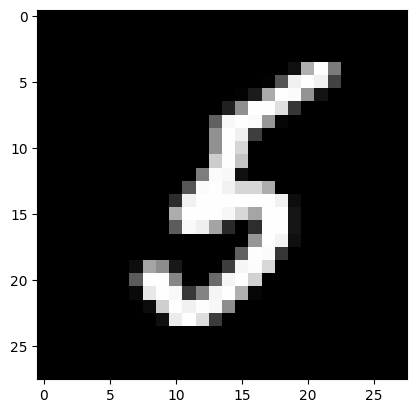

In [171]:
plt.imshow(x_train[553].reshape([28, 28]), cmap='Greys_r')

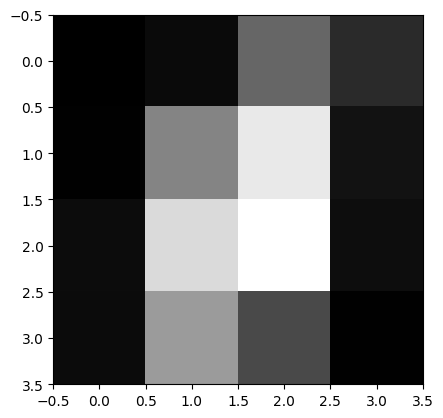

In [172]:
resolution = 4 # 4x4 image resolution
x_train_shrunk = shrinkdata(x_train, resolution)
x_test_shrunk = shrinkdata(x_test, resolution)

plt.imshow(x_train_shrunk[553].reshape([resolution, resolution]), cmap='Greys_r')

In [141]:
def calculate_accuracy(x_test, y_test, weights, bias):

    correct = 0

    for sample, label in zip(x_test, y_test):

        prediction = predict(sample, weights, bias)

        if prediction == label:
            correct += 1

    accuracy = correct / len(x_test)
    return accuracy

In [159]:
weights, bias, errors = optimize_perceptron(x_train_shrunk, y_train, learning_rate = 0.001, maxEpochs = 100)

Epoch 1. loss: 0.14480963228115848
Epoch 2. loss: 0.0981125935567849
Epoch 3. loss: 0.08493328994467947
Epoch 4. loss: 0.0782622844126261
Epoch 5. loss: 0.07289293849658314
Epoch 6. loss: 0.06931337455255451
Epoch 7. loss: 0.06589651806052717
Epoch 8. loss: 0.06426944354051416
Epoch 9. loss: 0.062316954116498534
Epoch 10. loss: 0.060689879596485516
Epoch 11. loss: 0.06003904978848031
Epoch 12. loss: 0.0585746827204686
Epoch 13. loss: 0.05824926781646599
Epoch 14. loss: 0.05711031565245688
Epoch 15. loss: 0.055483241132443864
Epoch 16. loss: 0.053856166612430846
Epoch 17. loss: 0.05304262935242434
Epoch 18. loss: 0.052717214448421736
Epoch 19. loss: 0.05206638464041653
Epoch 20. loss: 0.05076472502440612
Epoch 21. loss: 0.049300357956394404
Epoch 22. loss: 0.0491376505043931
Epoch 23. loss: 0.048649528148389194
Epoch 24. loss: 0.04848682069638789
Epoch 25. loss: 0.047673283436381386
Epoch 26. loss: 0.04734786853237878
Epoch 27. loss: 0.04685974617637488
Epoch 28. loss: 0.045883501464367

[np.float64(0.14480963228115848), np.float64(0.0981125935567849), np.float64(0.08493328994467947), np.float64(0.0782622844126261), np.float64(0.07289293849658314), np.float64(0.06931337455255451), np.float64(0.06589651806052717), np.float64(0.06426944354051416), np.float64(0.062316954116498534), np.float64(0.060689879596485516), np.float64(0.06003904978848031), np.float64(0.0585746827204686), np.float64(0.05824926781646599), np.float64(0.05711031565245688), np.float64(0.055483241132443864), np.float64(0.053856166612430846), np.float64(0.05304262935242434), np.float64(0.052717214448421736), np.float64(0.05206638464041653), np.float64(0.05076472502440612), np.float64(0.049300357956394404), np.float64(0.0491376505043931), np.float64(0.048649528148389194), np.float64(0.04848682069638789), np.float64(0.047673283436381386), np.float64(0.04734786853237878), np.float64(0.04685974617637488), np.float64(0.045883501464367066), np.float64(0.045883501464367066), np.float64(0.04523267165636186), np.

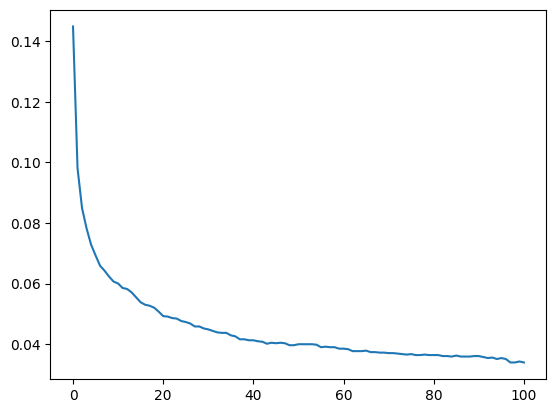

In [160]:
print(errors)
plt.plot(errors)

In [161]:
acc = calculate_accuracy(x_test_shrunk, y_test, weights, bias)
print('Accuracy: ', acc)

Accuracy:  0.9755978526110298


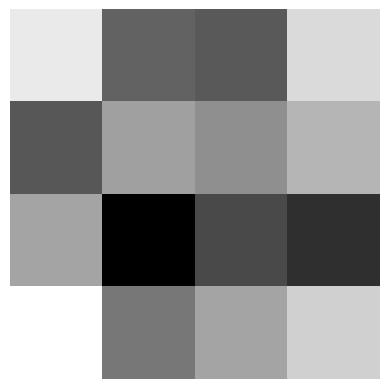

[[ 0.36283101 -0.06630965 -0.09434991  0.29588978]
 [-0.09839774  0.11417954  0.06950373  0.168088  ]
 [ 0.12353759 -0.32090507 -0.13521446 -0.19535677]
 [ 0.49311704 -0.0025508   0.12377014  0.25979509]]


In [23]:
weights.resize((resolution, resolution))
plt.imshow(weights, cmap='Greys_r')
plt.axis('off')
plt.show()

print(weights)